# IMDB binary classification (movie review classification)

## Load data

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Preprocessing
- Convert data to one-hot encoding

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model definition(2 hidden layers, 16 hidden nodes)

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Model compile

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Preparing Validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training model

In [ ]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 76ms/step - loss: 0.1472 - acc: 0.9495 - val_loss: 0.1497 - val_acc: 0.9481
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1223 - acc: 0.9590 - val_loss: 0.1606 - val_acc: 0.9411
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1042 - acc: 0.9655 - val_loss: 0.1715 - val_acc: 0.9366
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0848 - acc: 0.9748 - val_loss: 0.2024 - val_acc: 0.9238
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0735 - acc: 0.9774 - val_loss: 0.2092 - val_acc: 0.9240
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0581 - acc: 0.9844 - val_loss: 0.2260 - val_acc: 0.9203
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0506 - acc: 0.9873 - val_loss: 0.2514 - val_acc: 0.9144
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0409 - a

## Drawing graph

#### 1) Epochs-Loss graph

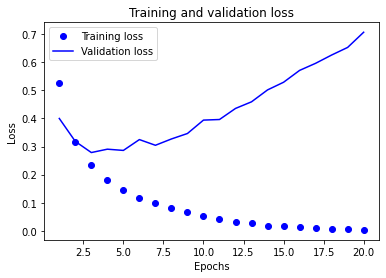

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 2) Epochs-Acc graph

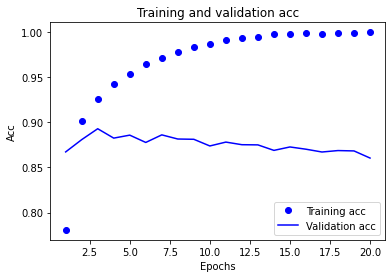

In [ ]:
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

## Predict using test data
- close to 1 : positive review
- close to 0 : negative review

In [ ]:
model.predict(x_test)

array([[0.00255269],
       [1.        ],
       [0.98770297],
       ...,
       [0.00405589],
       [0.01509225],
       [0.97757816]], dtype=float32)

## Improvements

- 3개의 은닉층 사용
- 은닉 유닛 수 감소, 증가(8개, 32개, 64개)
- binary_crossentropy 대신 mse 손실함수 사용
- relu 대신 tanh 활성화 함수 사용
- optimizer로 rmsprop 대신 adam 사용
- Early stopping

## Original Model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
result0 = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5098 - acc: 0.7871 - val_loss: 0.3780 - val_acc: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3001 - acc: 0.9026 - val_loss: 0.3004 - val_acc: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2163 - acc: 0.9287 - val_loss: 0.2994 - val_acc: 0.8776
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1721 - acc: 0.9432 - val_loss: 0.2819 - val_acc: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1385 - acc: 0.9567 - val_loss: 0.2915 - val_acc: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1139 - acc: 0.9649 - val_loss: 0.3115 - val_acc: 0.8806
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0948 - acc: 0.9712 - val_loss: 0.3187 - val_acc: 0.8826
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0754 - a

## Improvements1 - Using 3 hidden layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))  # added 1 hidden layer
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
result1 = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5524 - acc: 0.7708 - val_loss: 0.4188 - val_acc: 0.8589
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3248 - acc: 0.8959 - val_loss: 0.3089 - val_acc: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2278 - acc: 0.9265 - val_loss: 0.2781 - val_acc: 0.8931
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1771 - acc: 0.9392 - val_loss: 0.3094 - val_acc: 0.8761
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1332 - acc: 0.9587 - val_loss: 0.3045 - val_acc: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1084 - acc: 0.9659 - val_loss: 0.3021 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0875 - acc: 0.9746 - val_loss: 0.3315 - val_acc: 0.8801
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0629 - a

## Improvements2 - Increasing the num of hidden units to 32

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))  # hidden unit 16 -> 32
model.add(layers.Dense(32, activation='relu'))  # hidden unit 16 -> 32
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
result2 = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.4899 - acc: 0.7899 - val_loss: 0.3491 - val_acc: 0.8781
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2751 - acc: 0.9054 - val_loss: 0.2861 - val_acc: 0.8915
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1997 - acc: 0.9321 - val_loss: 0.2724 - val_acc: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1551 - acc: 0.9479 - val_loss: 0.2856 - val_acc: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1277 - acc: 0.9565 - val_loss: 0.3022 - val_acc: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1024 - acc: 0.9667 - val_loss: 0.3281 - val_acc: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0808 - acc: 0.9750 - val_loss: 0.3450 - val_acc: 0.8819
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0712 - a

## Improvements3 - Increaseing the num of hidden units to 64

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))  # hidden unit 16 -> 64
model.add(layers.Dense(64, activation='relu'))  # hidden unit 16 -> 64
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
result3 = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.4869 - acc: 0.7610 - val_loss: 0.3193 - val_acc: 0.8786
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2546 - acc: 0.9042 - val_loss: 0.2863 - val_acc: 0.8856
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1881 - acc: 0.9303 - val_loss: 0.3666 - val_acc: 0.8581
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1370 - acc: 0.9499 - val_loss: 0.2984 - val_acc: 0.8857
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1149 - acc: 0.9601 - val_loss: 0.3159 - val_acc: 0.8834
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0803 - acc: 0.9744 - val_loss: 0.3837 - val_acc: 0.8726
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0614 - acc: 0.9798 - val_loss: 0.3932 - val_acc: 0.8784
Epoch 8/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0538 - a

## Improvements4 - Using mse instead of binary_crossentropy

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['acc']) # loss binary_crossentropy -> mse
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
result4 = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.1663 - acc: 0.7919 - val_loss: 0.1180 - val_acc: 0.8647
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0867 - acc: 0.9080 - val_loss: 0.0895 - val_acc: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0636 - acc: 0.9281 - val_loss: 0.0842 - val_acc: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0487 - acc: 0.9464 - val_loss: 0.0852 - val_acc: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0399 - acc: 0.9579 - val_loss: 0.0839 - val_acc: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0312 - acc: 0.9693 - val_loss: 0.0843 - val_acc: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0266 - acc: 0.9737 - val_loss: 0.0879 - val_acc: 0.8808
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0210 - a

## Improvements5 - Using tanh activation function instead of relu

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))  # relu -> tanh
model.add(layers.Dense(16, activation='tanh'))  # relu -> tanh
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
result5 = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.4702 - acc: 0.7957 - val_loss: 0.3540 - val_acc: 0.8660
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2657 - acc: 0.9089 - val_loss: 0.2834 - val_acc: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1894 - acc: 0.9350 - val_loss: 0.2909 - val_acc: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1449 - acc: 0.9497 - val_loss: 0.2828 - val_acc: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1120 - acc: 0.9639 - val_loss: 0.3081 - val_acc: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0872 - acc: 0.9716 - val_loss: 0.3710 - val_acc: 0.8711
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0637 - acc: 0.9803 - val_loss: 0.3907 - val_acc: 0.8785
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0512 - a

## Improvements6 - Using adam optimizer instead of rmsprop

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])  # optimizer rmsprop -> adam
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
result6 = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6108 - acc: 0.7499 - val_loss: 0.4909 - val_acc: 0.8509
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3857 - acc: 0.8899 - val_loss: 0.3411 - val_acc: 0.8797
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2547 - acc: 0.9203 - val_loss: 0.2868 - val_acc: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1875 - acc: 0.9401 - val_loss: 0.2755 - val_acc: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1437 - acc: 0.9562 - val_loss: 0.2805 - val_acc: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1122 - acc: 0.9691 - val_loss: 0.2947 - val_acc: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0878 - acc: 0.9781 - val_loss: 0.3142 - val_acc: 0.8809
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0683 - a

## Improvements7 - Early stopping



In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512) # epochs 20 -> 4
result7 = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4878 - acc: 0.8073
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2766 - acc: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2097 - acc: 0.9246
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2965 - acc: 0.8814


## 각 variation별 test accuracy 비교

In [ ]:
print("----------Test acc for various trial----------")
print("Original Model : ", result0[1])
print("Improvements1(hidden layer 2->3) : ", result1[1])
print("Improvements2(hidden units 16->32) : ", result2[1])
print("Improvements3(hidden units 16->64) : ", result3[1])
print("Improvements4(loss func : binary_crossentropy->mse) : ", result4[1])
print("Improvements5(activation func : relu->tanh) : ", result5[1])
print("Improvements6(optimizer : rmsprop->adam) : ", result6[1])
print("Improvements7(early stopping) : ", result7[1])

----------Test acc for various trial----------
Original Model :  0.8492799997329712
Improvements1(hidden layer 2->3) :  0.8445600271224976
Improvements2(hidden units 16->32) :  0.8471599817276001
Improvements3(hidden units 16->64) :  0.8504800200462341
Improvements4(loss func : binary_crossentropy->mse) :  0.8533599972724915
Improvements5(activation func : relu->tanh) :  0.8417999744415283
Improvements6(optimizer : rmsprop->adam) :  0.8563200235366821
Improvements7(early stopping) :  0.8814399838447571


- 그래프에서 y축은 test accuracy, x축의 0,1,2,...7은 각각 original, improvements1, improvements2...를 나타냄

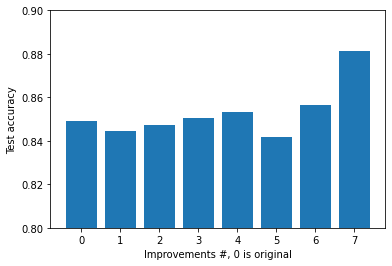

In [ ]:
trial = ['0', '1', '2', '3', '4', '5', '6', '7']
values = [result0[1], result1[1], result2[1], result3[1], result4[1], result5[1], result6[1], result7[1]]

plt.bar(trial, values)
plt.xlabel('Improvements #, 0 is original')
plt.ylabel('Test accuracy')
plt.ylim([0.8,0.9]) # y축 [최소,최대] 스케일 조정

plt.show()

## Conclusion
- 은닉층을 2개에서 3개로 증가시켰을 때 test acc의 차이는 0.004 정도로 큰 변화가 없었다.
- 은닉 유닛을 증가시키면 아주 약간의 test accuracy가 증가하였지만 역시 큰 변화는 없었다.
- loss function을 binary_crossentropy에서 mse로 변화시키면 0.005 정도의 test acc 증가가 있었다.
- 활성화 함수를 relu에서 tanh으로 변화시키면 약 0.008 정도의 test acc 감소가 있었다.
- optimizer를 rmsprop에서 adam으로 바꾸었더니 0.007의 test acc 증가가 있었다.
- early stopping을 사용하여 학습을 조기종료 시켰더니 0.04의 큰 test acc 증가가 있었다.
- 단순히 hidden layer나 hidden unit의 갯수 조정보다도 해결하고자 하는 문제에 **적절한 activation function과 optimizer의 선택**이 결과에 더 크게 영향을 미친다. 
- **Early stopping은 overfitting을 방지하여 test acc를 증가시킬 수 있는 굉장히 효과적인 방법이다.**
